**TALLER 1**

**Sergio Amado**

**Ana María Garzón** 



In [22]:
import pandas_datareader as wb
import pandas as pd
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
!pip install --quiet yfinance 
import yfinance as yf
from pandas_datareader import data as wb
from datetime import datetime
yf.pdr_override()
import scipy.stats as stats

Punto 1

Las acciones escogidas fueron Ferrari y 

---

Ford, las dos del mismo sector

In [23]:
acciones=["RACE","F"]
inicio="2021-01-01"
fin="2022-12-31"
precios= wb.DataReader(acciones,inicio,fin,interval="1d")
precios=precios.loc[:,"Adj Close"]

[*********************100%***********************]  2 of 2 completed


**a. Calcule los retornos logarítmicos diarios, mensuales y anualizados. Presente los
resultados en una tabla.** 

In [24]:
retornos_d = np.log(precios/precios.shift(1)).dropna()
retornos_d

,F,RACE
Date,,
2021-01-05,0.015143,-0.004105
2021-01-06,0.021728,-0.019338
2021-01-07,0.024582,0.001577
2021-01-08,-0.006645,-0.018770
2021-01-11,0.032790,-0.000046
...,...,...
2022-12-23,0.004411,-0.007319
2022-12-27,-0.014185,0.004681
2022-12-28,-0.022574,-0.008289


In [25]:
#retornos diarios
retornos_d.mean()

F       0.000694
RACE   -0.000092
dtype: float64

In [26]:
#Retornos anuales 
retornos_d.mean()*252

F       0.174832
RACE   -0.023289
dtype: float64

In [27]:
#Retornos mensuales
retornos_d.mean()*21

F       0.014569
RACE   -0.001941
dtype: float64

In [28]:
#representación de los distintos retornos
tabla={"Ticket":["RACE","F"],
               "retornos_d":[retornos_d["RACE"].mean(),retornos_d["F"].mean()],
               "retornos_a":[retornos_d["RACE"].mean()*252,retornos_d["F"].mean()*252],
               "retornos_m":[retornos_d["RACE"].mean()*21,retornos_d["F"].mean()*21]}
             
accion=pd.DataFrame(tabla,index=["RACE","F"])
accion

,Ticket,retornos_d,retornos_a,retornos_m
RACE,RACE,-0.000092,-0.023289,-0.001941
F,F,0.000694,0.174832,0.014569


Se puede observar que en las distintas periodicidades Ford ha tenido un mejor rendimiento que Ferrari

**b.Calcule los retornos esperados y volatilidades anualizadas.**

In [29]:
#retornos esperados
retornos_e=retornos_d.std()
retornos_e

F       0.028791
RACE    0.018642
dtype: float64

In [30]:
#volatilidad anualizada
volatilidad_d=retornos_d.std()+ np.sqrt(252)
volatilidad_d

F       15.903299
RACE    15.893150
dtype: float64

En este caso se espera que los retornos esperados de las dos compañias sea positivo, mientras que la volatilidad anualizada se mantiene semejante en las dos empresas

**c.Construya una tabla resumen con las estadísticas descriptivas de las series diarias
(media, mediana, desv. estándar, curtosis, simetría) de los dos activos.**

In [31]:
tabla_1={"Ticket":["RACE","F"],
               "Media":[retornos_d["RACE"].mean(),retornos_d["F"].mean()],
               "Mediana":[retornos_d["RACE"].median(),retornos_d["F"].median()],
               "Desviación":[retornos_d["RACE"].std(),retornos_d["F"].std()],
               "Curtosis":[retornos_d["RACE"].kurt(),retornos_d["F"].kurt()],
               "Asimetría":[retornos_d["RACE"].skew(),retornos_d["F"].skew()]}
medidas=pd.DataFrame(tabla_1,index=["RACE","F"])
medidas

,Ticket,Media,Mediana,Desviación,Curtosis,Asimetría
RACE,RACE,-0.000092,0.000358,0.018642,2.005598,0.07918
F,F,0.000694,-0.000350,0.028791,1.886847,-0.07146


**d.Compare las distribuciones empíricas de los dos activos con la distribución teórica
normal.**

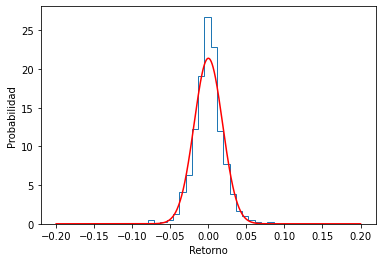

In [32]:
#comparacion de race
x= np.linspace(-0.2,0.2,num=1000) 
plt.xlabel("Retorno")
plt.ylabel("Probabilidad")
plt.hist(retornos_d["RACE"],density=True,histtype="step",bins=20);
plt.plot(x,norm.pdf(x,scale=retornos_d["RACE"].std()),"r")
plt.show();

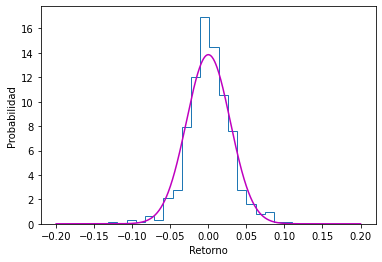

In [33]:
#comparacion F
x= np.linspace(-0.2,0.2,num=1000) 
plt.xlabel("Retorno")
plt.ylabel("Probabilidad")
plt.hist(retornos_d["F"],density=True,histtype="step",bins=20);
plt.plot(x,norm.pdf(x,scale=retornos_d["F"].std()),"m")
plt.show();

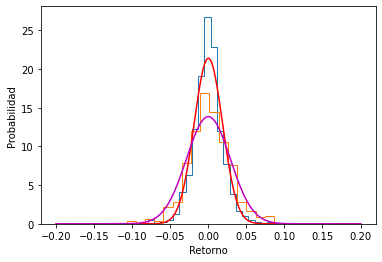

In [34]:
#comparacion de las 2
x= np.linspace(-0.2,0.2,num=1000) 
plt.xlabel("Retorno")
plt.ylabel("Probabilidad")
plt.hist(retornos_d["RACE"],density=True,histtype="step",bins=20);
plt.hist(retornos_d["F"],density=True,histtype="step",bins=20);
plt.plot(x,norm.pdf(x,scale=retornos_d["RACE"].std()),"r")
plt.plot(x,norm.pdf(x,scale=retornos_d["F"].std()),"m")
plt.show();

Se puede observar que las variables de la empresa presentan cierta correlación, mientras que Ford presenta un retorno mayor, mientras que Race presenta una probabilidad mas alta

**e. Calcule la matriz de correlaciones de Pearson, rango de Kendall y de Spearman.**

In [35]:
#kendall
stats.kendalltau(retornos_d["RACE"],retornos_d["F"])

KendalltauResult(correlation=0.37264749337619774, pvalue=9.634943644630554e-36)

In [36]:
#Pearson
retornos_d.corr()

,F,RACE
F,1.000000,0.499876
RACE,0.499876,1.000000


In [37]:
#Spearman
stats.spearmanr(retornos_d["RACE"],retornos_d["F"])

SpearmanrResult(correlation=0.5302041926259188, pvalue=9.777792812986526e-38)

Se observa una correlacion positiva entre las dos compañias


Punto 2 

Escoja 10 acciones de su preferencia en el mercado estadounidense. Para estas
acciones descargue las series de precios mensuales para el periodo Dic-17 a Dic-2022.
Con esta información:



In [38]:
#precios mensuales
Activos = ["VZ", "GM", "KO", "PG", "SBUX","TXN", "CSCO", "DIS", "MA", "V"]
Precios = yf.download(Activos,start="2017-12-01",end="2022-12-31",interval="1Mo")["Adj Close"].dropna()
Precios



[*********************100%***********************]  10 of 10 completed


,CSCO,DIS,GM,KO,MA,PG,SBUX,TXN,V,VZ
Date,,,,,,,,,,
2017-12-01,32.658138,103.719643,36.831676,39.133896,147.078522,79.685944,51.611752,90.749443,110.121437,41.475784
2018-01-01,35.420864,105.682114,38.454300,40.592457,164.219589,74.881187,51.054562,95.293854,119.982330,42.369080
2018-02-01,38.468407,100.323616,35.679710,36.865017,171.057251,68.618195,51.315174,94.667931,118.736450,37.835003
2018-03-01,36.844791,97.678406,32.950462,37.044140,170.473328,69.282341,52.307323,90.771141,115.731110,37.898399
2018-04-01,38.047462,97.571419,33.651993,37.181839,173.500076,63.217541,52.018181,88.621765,122.755074,39.110962
...,...,...,...,...,...,...,...,...,...,...
2022-08-01,43.957218,112.080002,38.038368,60.831909,323.322754,136.113831,82.701622,162.743378,197.529404,40.480667
2022-09-01,39.317730,94.330002,32.018795,55.222874,283.421997,124.578590,83.360809,152.469086,176.907303,36.762756
2022-10-01,44.655106,106.540001,39.162907,59.428520,327.120453,132.887115,85.665932,158.231750,206.293945,36.181831


In [39]:
#Calcule los retornos y voltilidades anualizadas 
retornos = np.log(Precios/Precios.shift(1)).dropna()

Sigma = retornos.std()
Sigma*np.sqrt(12)



CSCO    0.271049
DIS     0.321140
GM      0.397677
KO      0.197600
MA      0.279407
PG      0.173939
SBUX    0.266532
TXN     0.246340
V       0.235410
VZ      0.171293
dtype: float64

In [40]:
#Volatilidades 
print ("Volatilidades",Sigma)

Volatilidades CSCO    0.078245
DIS     0.092705
GM      0.114799
KO      0.057042
MA      0.080658
PG      0.050212
SBUX    0.076941
TXN     0.071112
V       0.067957
VZ      0.049448
dtype: float64


In [41]:
#ranqueo de retornos de menor a mayor 
R=(Sigma*np.sqrt(12)).sort_values()
TR= pd.DataFrame(R)
TR

,0
VZ,0.171293
PG,0.173939
KO,0.197600
V,0.235410
TXN,0.246340
SBUX,0.266532
CSCO,0.271049
MA,0.279407
DIS,0.321140
GM,0.397677


Punto 3

3. Descargue la serie mensual de precios del índice estadounidense Rusell para el periodo
Dic-11 a Dic-2022. Con esta información calcule la volatilidad mensual y anualizada usando
las siguientes medidas:




In [42]:
ACTIVOS = "^RUT"
PRECIOS = yf.download(ACTIVOS,start="2011-12-01", end="2022-12-31", interval="1Mo")["Adj Close"].dropna()
PRECIOS

[*********************100%***********************]  1 of 1 completed


Date
2011-12-01     740.919983
2012-01-01     792.820007
2012-02-01     810.940002
2012-03-01     830.299988
2012-04-01     816.880005
                 ...     
2022-08-01    1844.119995
2022-09-01    1664.719971
2022-10-01    1846.859985
2022-11-01    1886.579956
2022-12-01    1761.250000
Name: Adj Close, Length: 133, dtype: float64

In [43]:
#retornos mensuales
RETORNOS = np.log(PRECIOS/PRECIOS.shift(1)).dropna()
Retornos_mensuales = RETORNOS.mean()
Retornos_mensuales

0.006559745674424816

In [44]:
#Retornos anuales 
Retornos_Anuales = Retornos_mensuales*12
Retornos_Anuales

0.07871694809309779

**a. Desviación Estándar**

In [45]:
#mensual
RETORNOS.std()



0.05474479591479422

In [46]:
#Anual
RETORNOS.std()*np.sqrt(12)

0.18964153594882538

**b. Parkinson**

In [47]:
ACTIVOS = "^RUT"
PRECIOS1 = yf.download(ACTIVOS,start="2011-12-01", end="2022-12-31", interval="1Mo").dropna()

[*********************100%***********************]  1 of 1 completed


In [48]:
#Mensual
lnHL = np.log(PRECIOS1["High"]/PRECIOS1["Low"]).dropna()  
sigmaPark_d = ((1/(4*np.log(2)))*lnHL**2)**0.5 
sigmaPark_d.mean()

0.05101216195814947

In [49]:
#ANUAL
(sigmaPark_d.mean())*np.sqrt(12)

0.1767113126308943

**c. Garman-Klass**

In [50]:
#Mensual
lnHL = np.log(PRECIOS1["High"]/PRECIOS1["Low"]).dropna()
LnCO = np.log(PRECIOS1["Close"]/PRECIOS1["Open"]).dropna()
sigmaGK_d = (0.5*lnHL**2-(2*np.log(2)-1)*LnCO**2)**0.5
sigmaGK_d.mean()

0.05239855062447297

In [51]:
#Anual
sigmaGK_d.mean()*np.sqrt(12)

0.1815139038491142

**d. Volatilidad EWMA Lambda de 0.94**

In [52]:
def vol_ewma(Retornos_mensuales,Lambda):
  k=len(RETORNOS)
  td=np.arange(k-1,-1,-1)
  alpha= Lambda**td
  var_s=(RETORNOS**2*alpha).sum()*(1-Lambda)
  M=np.sqrt(var_s)
  return (M)

In [53]:
vol_ewma(Retornos_mensuales,Lambda=0.94)

0.06830769009655513

In [54]:
def vol_ewma(Retornos_Anuales,Lambda):
  k=len(RETORNOS)
  td=np.arange(k-1,-1,-1)
  alpha= Lambda**td
  var_s=(RETORNOS**2*alpha).sum()*(1-Lambda)
  vol_m=np.sqrt(var_s)
  A=vol_m*np.sqrt(12)
  return (A)

In [55]:
vol_ewma(Retornos_Anuales,Lambda=0.94)

0.23662477958980582